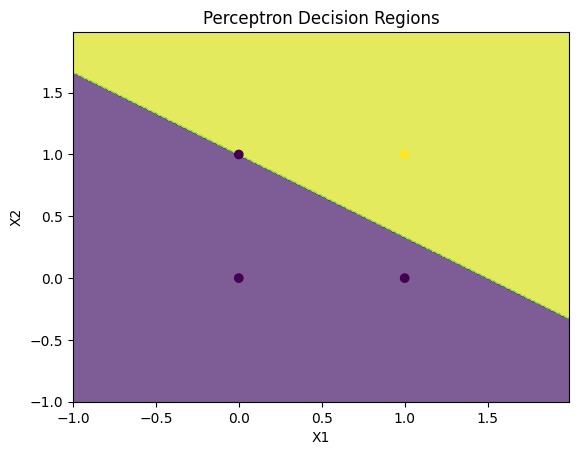

In [ ]:
# c-45 londhe siddhesh

import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y = np.array([-1, -1, -1, 1])

w = np.zeros(X.shape[1])
b = 0

for _ in range(6):
    for i in range(X.shape[0]):
        y_pred = np.sign(np.dot(X[i], w) + b)

        if y_pred != Y[i]:
            w += 0.3 * Y[i] * X[i]
            b += 0.3 * Y[i]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Decision Regions')
plt.show()

In [ ]:
# c-45 londhe

import numpy as np
X = np.array([[1, 1, 1, -1], [-1, -1, 1, 1]])
Y = np.array([[1, -1], [-1, 1]])
W = np.dot(Y.T, X)

def bam(x):
    return np.sign(np.dot(W, x))

x_test = np.array([1, -1, -1, -1])
y_test = bam(x_test)


print("Input x:", x_test)
print("Output y:", y_test)

Input x: [ 1 -1 -1 -1]
Output y: [ 1 -1]


In [ ]:
# c-45 londhe siddhesh

import numpy as np
input_neuron = 2
hidden_neuron = 4
output_neuron = 1
learning_rate = 0.1
epochs = 10000
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])
W1 = np.random.randn(input_neuron, hidden_neuron) * 0.01
W2 = np.random.randn(hidden_neuron, output_neuron) * 0.01
b1 = np.random.randn(1, hidden_neuron) * 0.01
b2 = np.random.randn(1, output_neuron) * 0.01
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)
for i in range(epochs):
    hidden_layer_input = np.dot(X, W1) + b1
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, W2) + b2
    output_layer_output = sigmoid(output_layer_input)
    output_error = Y - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)
    hidden_error = output_delta.dot(W2.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)
    W2 += np.dot(hidden_layer_output.T, output_delta) * learning_rate
    b2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    W1 += np.dot(X.T, hidden_delta) * learning_rate
    b1 += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate
x_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_test = np.array([[0], [1], [1], [0]])
hidden_layer_input = np.dot(x_test, W1) + b1
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, W2) + b2
output_layer_output = sigmoid(output_layer_input)
print("Input:")
print(x_test)
print("Output:")
print(output_layer_output)
print("Expected Output:")
print(y_test)

Input:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Output:
[[0.49999516]
 [0.50001047]
 [0.49998947]
 [0.50000478]]
Expected Output:
[[0]
 [1]
 [1]
 [0]]
